# Exercise 2 - Data Preparation

## Requirements

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)

## Preparation

In [149]:
df = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Ex.2_Spaceship_Titanic.csv")

In [150]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [151]:
df["HomePlanet"].unique()
df["HomePlanet"].value_counts()

HomePlanet
Earth     4487
Europa    2089
Mars      1716
Name: count, dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Discovering missing data
- We check if there are missing values in the dataset.

In [153]:
df.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [154]:
percentage_of_missing_values_per_column = df.isnull().sum() / len(df) * 100

In [155]:
percentage_of_missing_values_per_column = (
    percentage_of_missing_values_per_column.reset_index().rename(
        columns={"index": "column_name", 0: "missing_percentage"}
    )
)

In [156]:
percentage_of_missing_values_per_column

,column_name,missing_percentage
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


<Axes: >

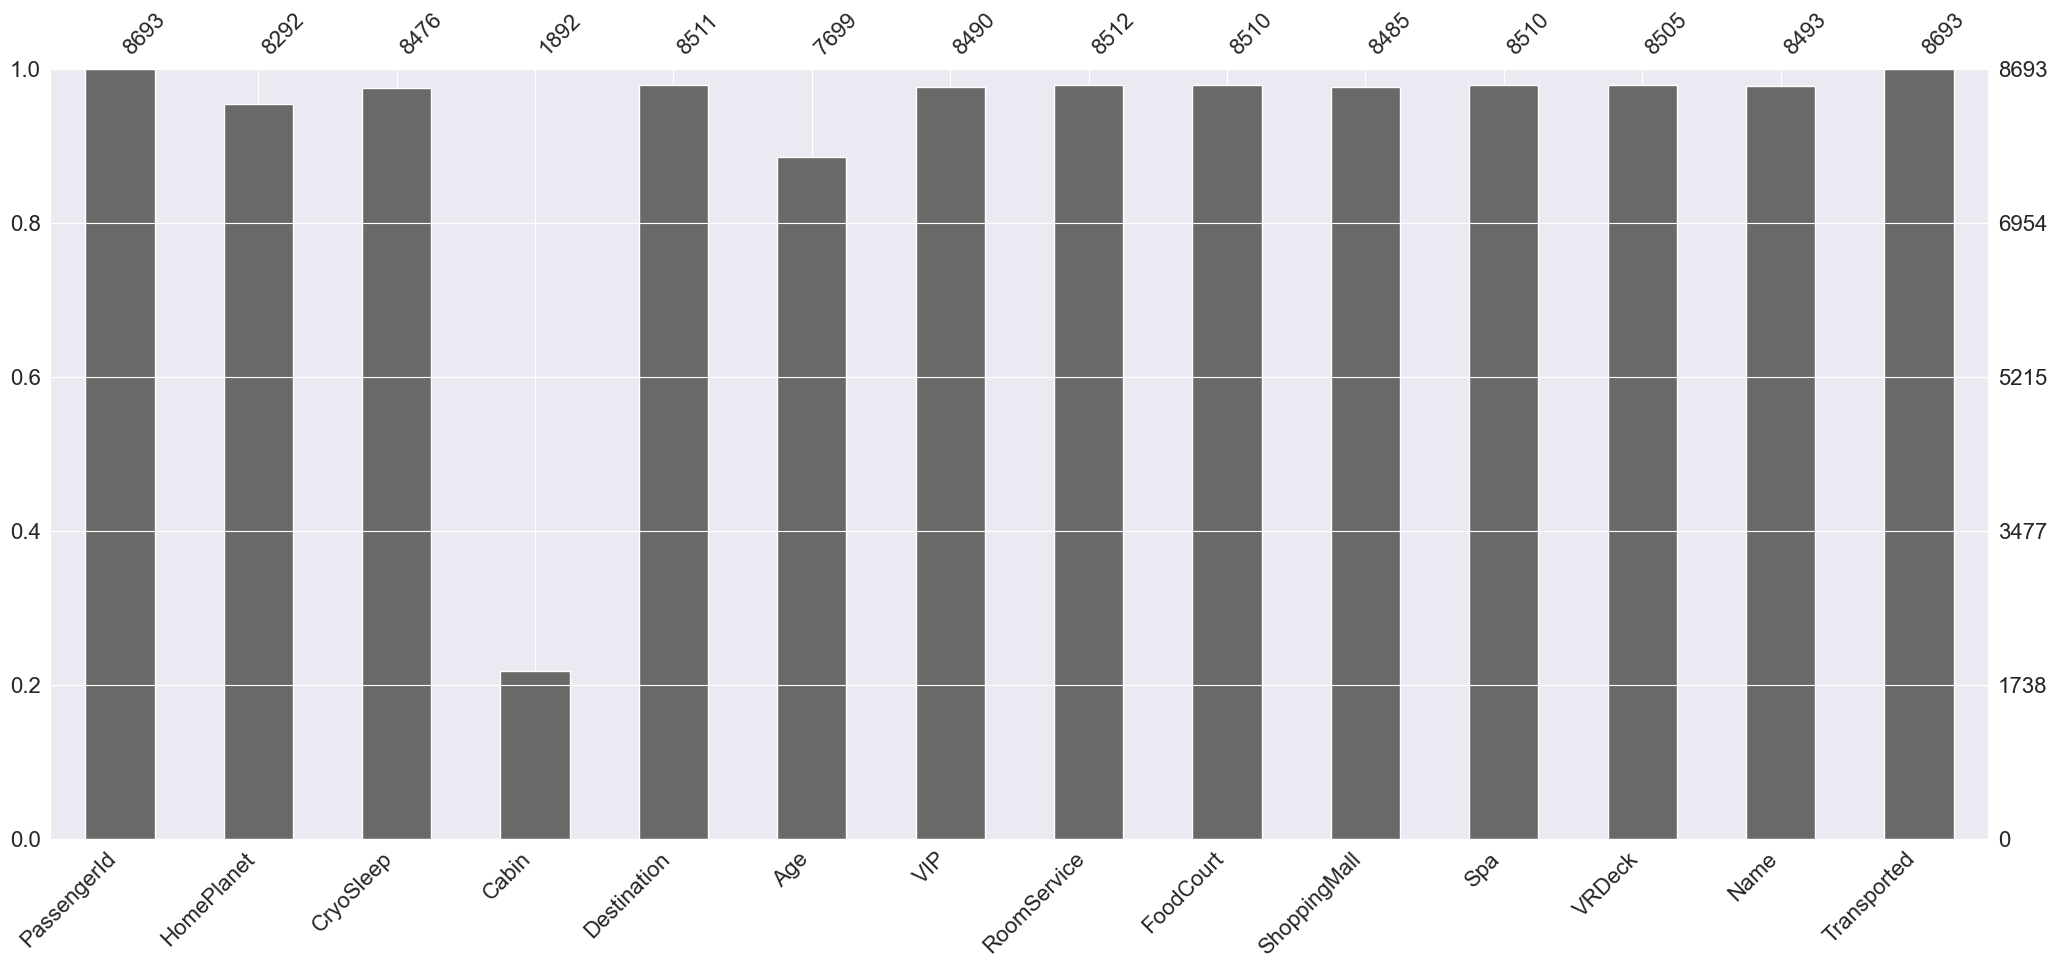

In [157]:
msno.bar(df)

The msno.matrix(df) function presents a nullity matrix that is a data-dense display which lets you quickly visually pick out patterns in data completion. The sparkline at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.

<Axes: >

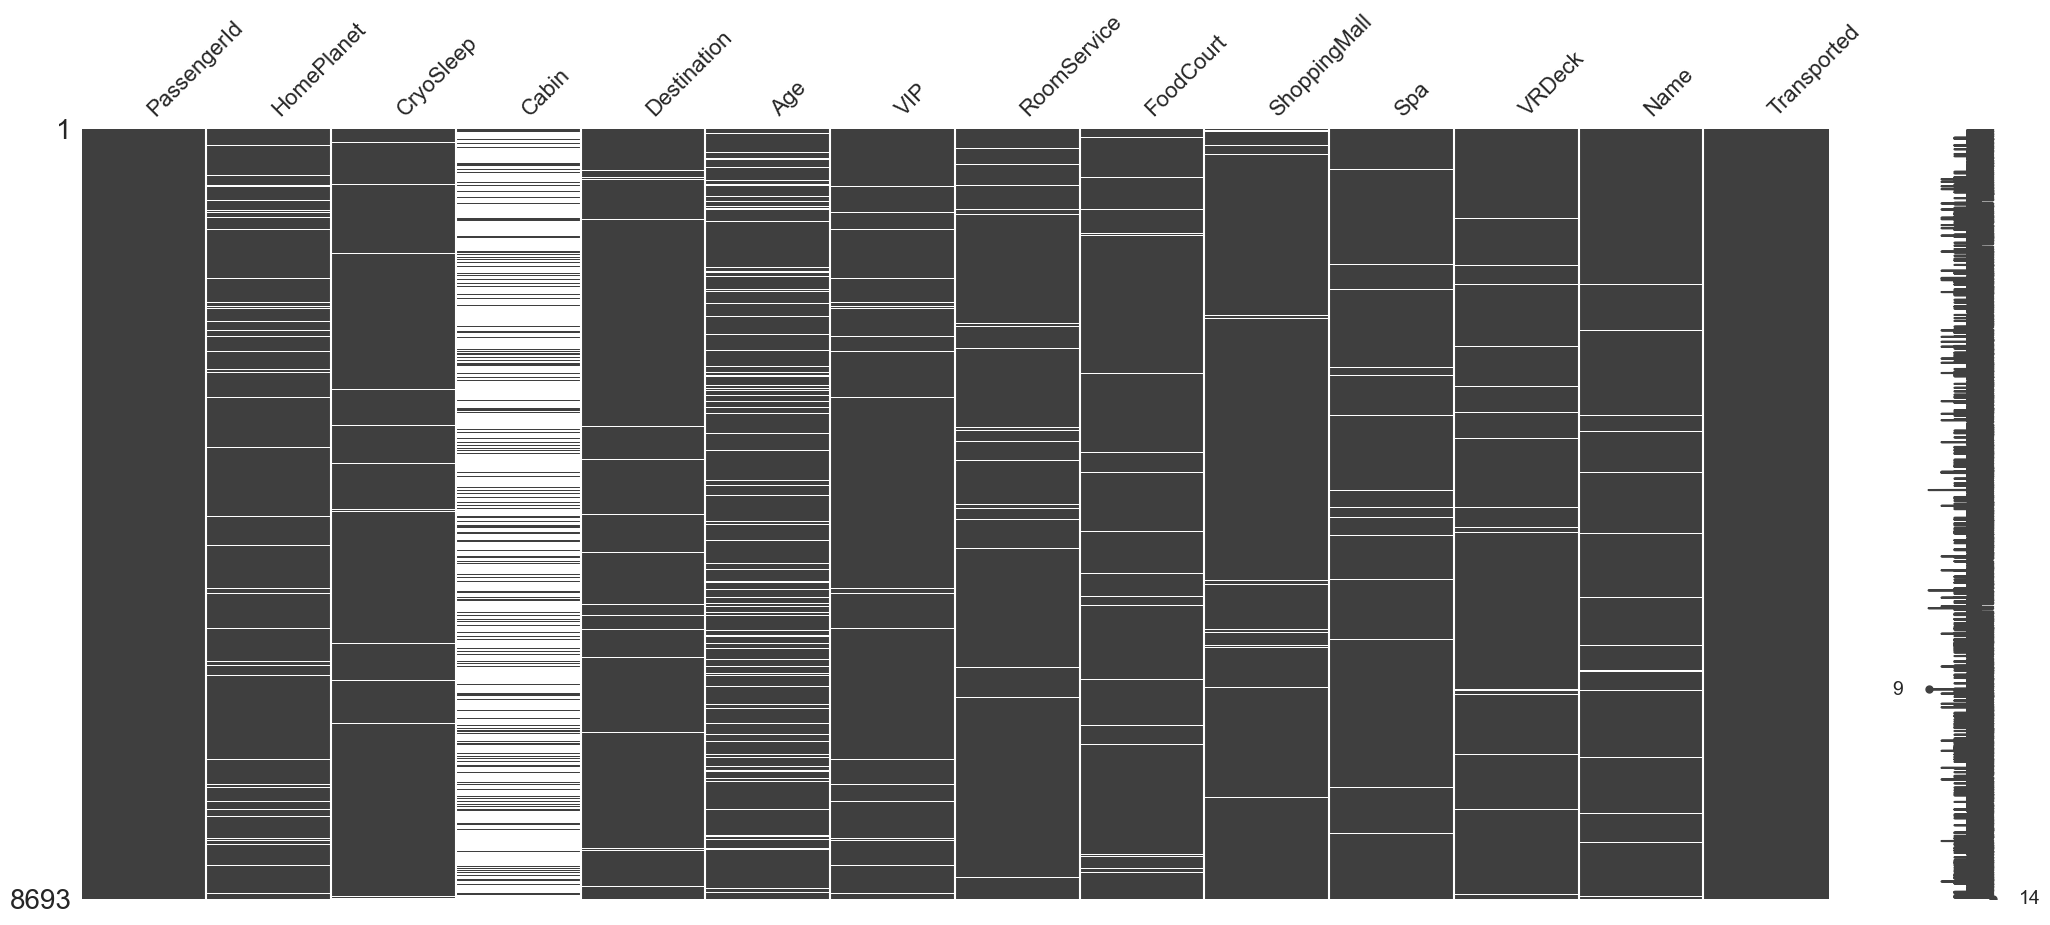

In [158]:
msno.matrix(df)

The missingno.heatmap(df) function presents a seaborn heatmap visualization of nullity correlation in the given data frame. The nullity correlation shows how strongly the presence or absence of one variable affects the presence or absence of another.

<Axes: >

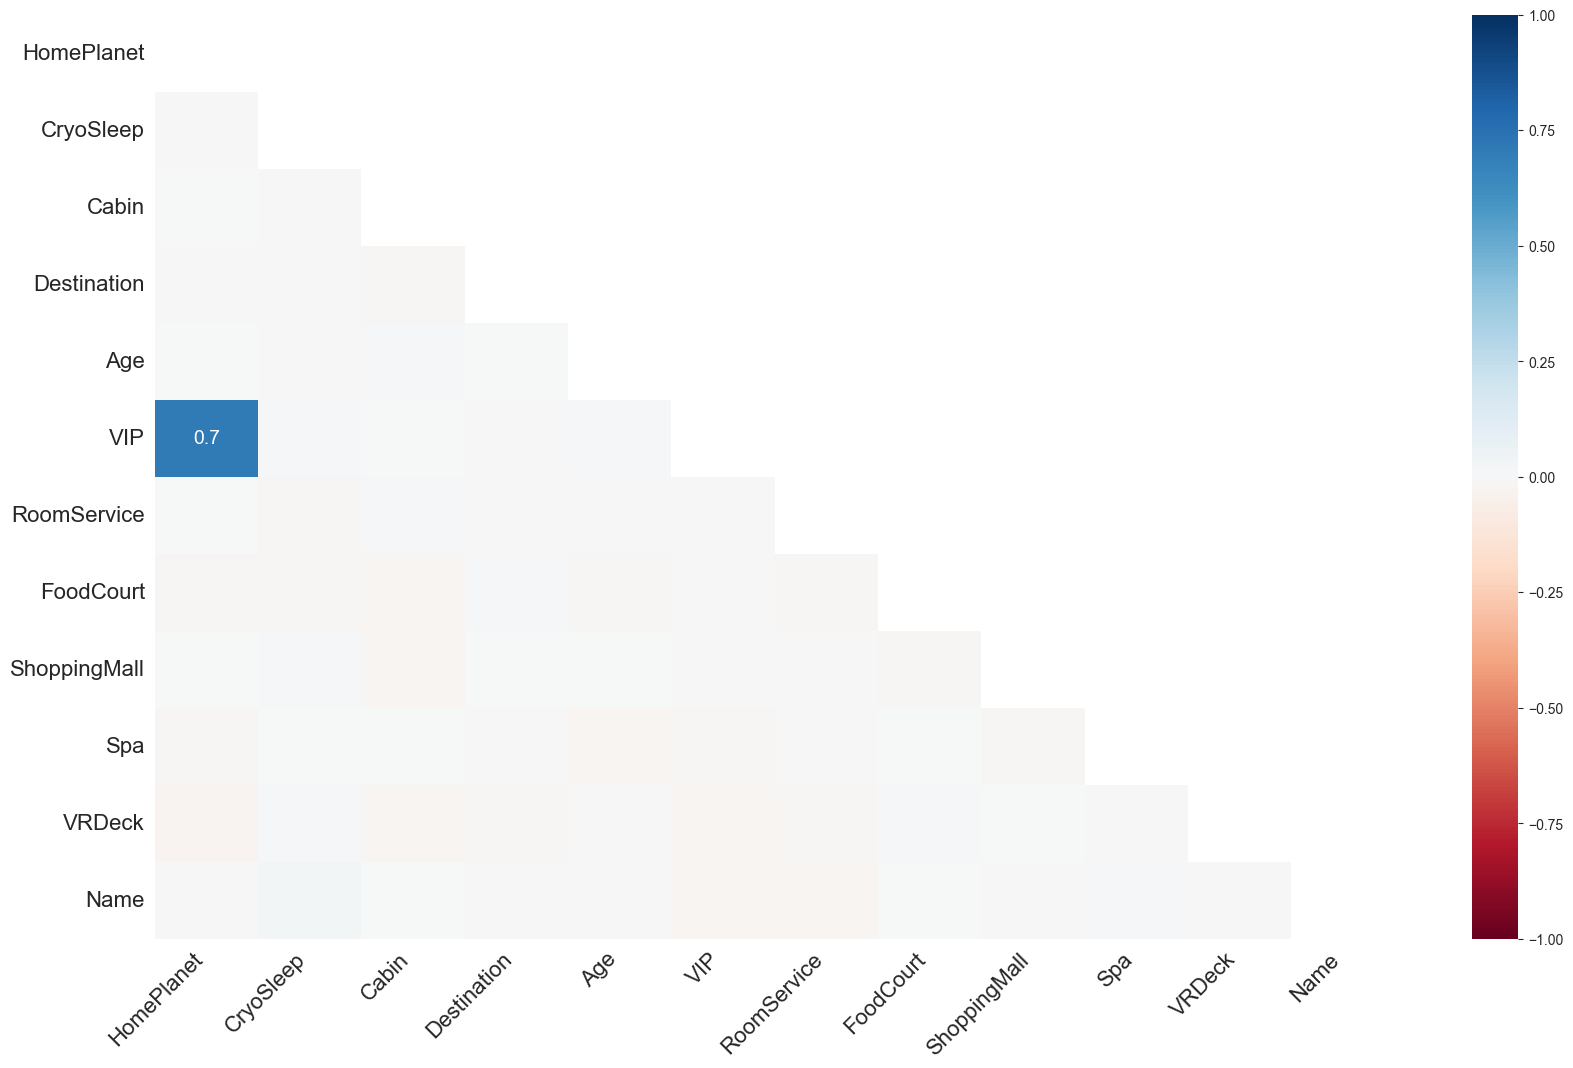

In [159]:
msno.heatmap(df)

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap. The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

<Axes: >

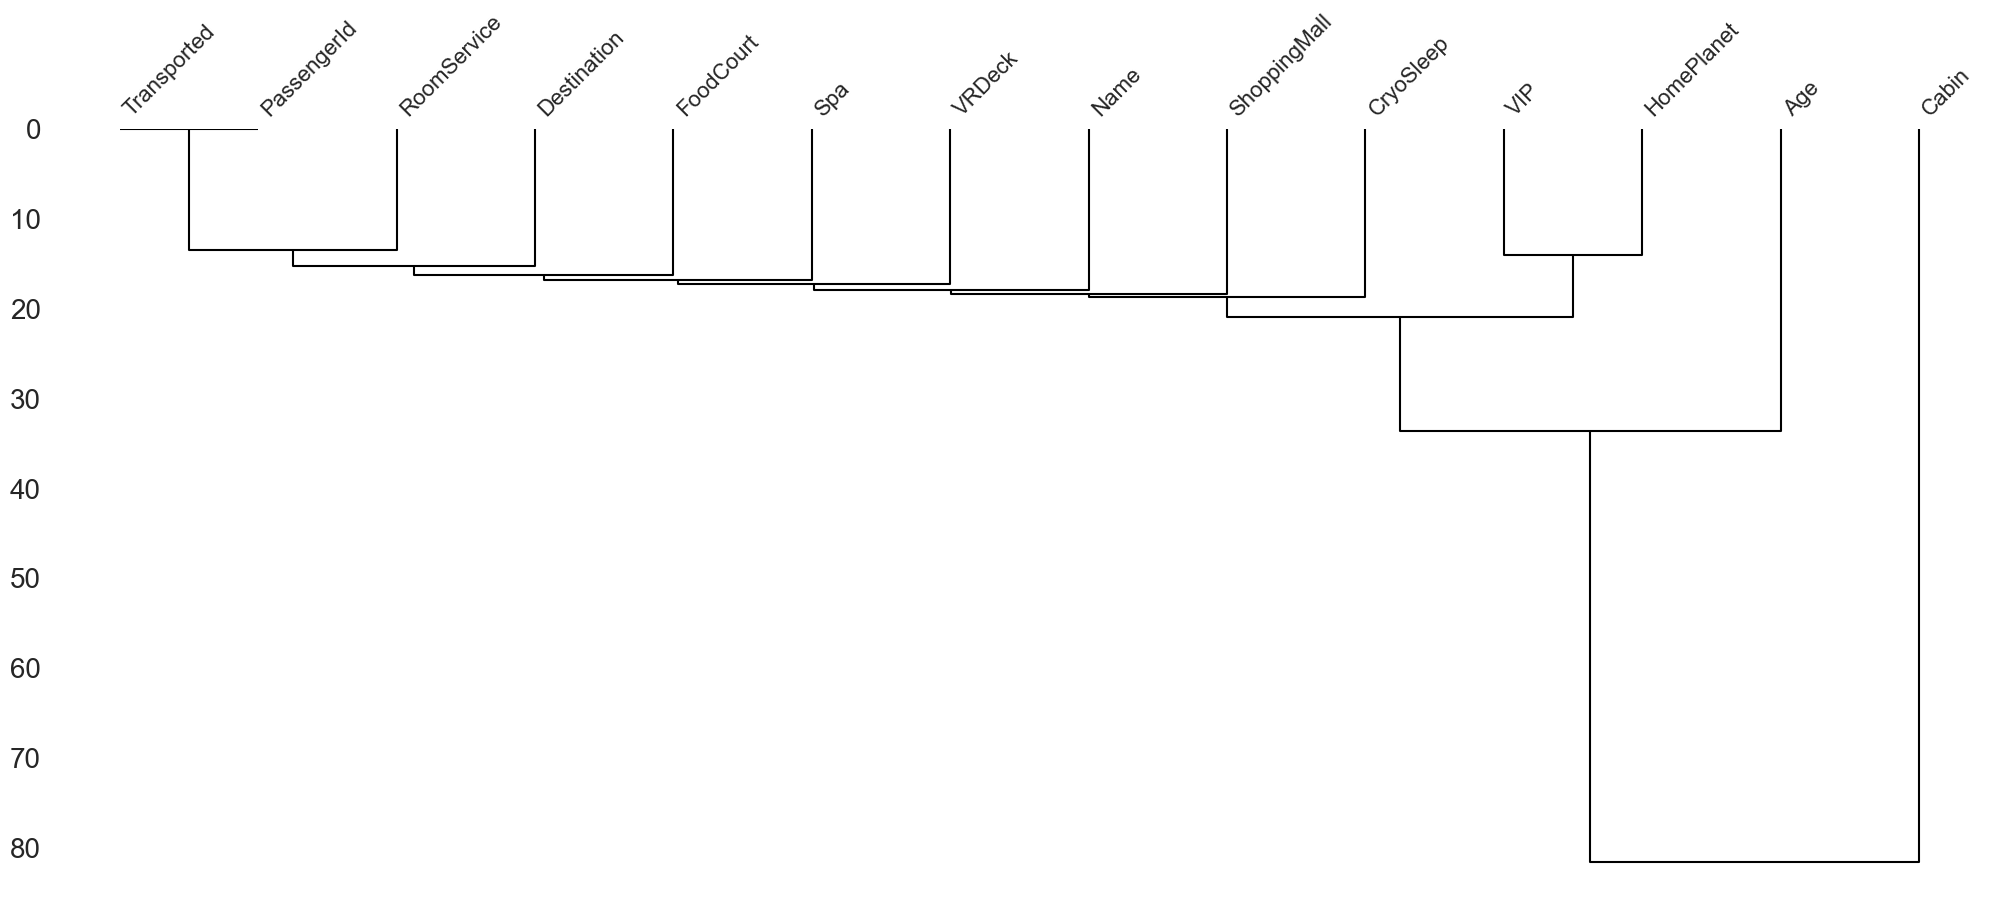

In [160]:
msno.dendrogram(df)

## Missing Values Overview
We have different ways data can be missing. It is important to identify which type it is as it will change how we should deal with it. The 3 types we will consider are Missing Completely At Random (MCAR), Missing At Random (MAR), and Missing Not At Random (MNAR).

The "pairwise deletion" method is used when values are missing completely at random, i.e, MCAR. During pairwise deletion, only the missing values are deleted. All operations in pandas like mean, sum, min, max, and similar, intrinsically skip missing values.

In [161]:
df["Age"].mean().item()

28.798805039615534

The "listwise deletion" method is used to remove complete rows which contain missing values. As a result, it is also called "complete case deletion". Like "pairwise deletion", "listwise deletion" is also only used for MCAR values.

In [162]:
df = df.dropna(subset=["RoomService"], axis=0)
df.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt        181
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

If a column contains a lot of missing values, say more than 70%, and the feature is not significant for the task at hand, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [163]:
df = df.drop(columns=["Cabin"])
df.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

### Missing Data Imputation



In [164]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [198]:
constant_imputer = SimpleImputer(strategy="constant", fill_value=0)
df["FoodCourt"] = constant_imputer.fit_transform([df["FoodCourt"]])[0]
df.isnull().sum()

PassengerId                     0
HomePlanet                    401
CryoSleep                     217
Cabin                        6801
Destination                   182
Age                           994
VIP                           203
RoomService                   181
FoodCourt                       0
ShoppingMall                  208
Spa                           183
VRDeck                        188
Name                          200
Transported                     0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
dtype: int64

<Axes: xlabel='HomePlanet'>

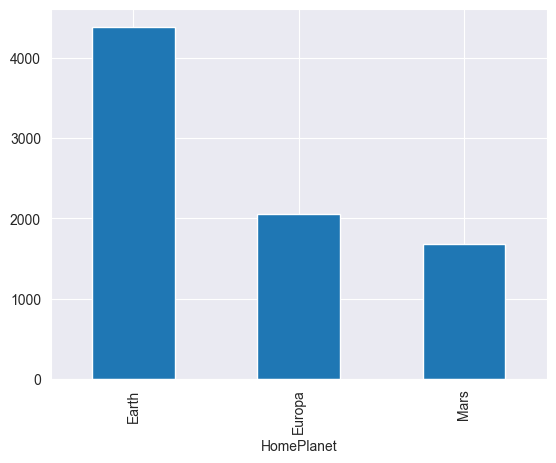

In [166]:
most_frequent_imputer = SimpleImputer(strategy="most_frequent")
df["HomePlanet"].value_counts().plot.bar()

In [167]:
df[["HomePlanet"]] = most_frequent_imputer.fit_transform(df[["HomePlanet"]])
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

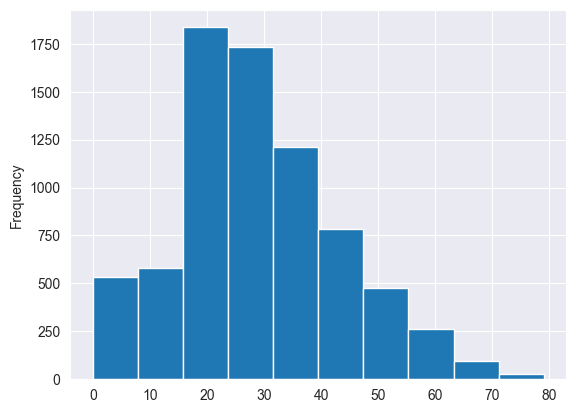

In [168]:
df["Age"].plot.hist()

In [169]:
mean_imputer = SimpleImputer(strategy="mean")
df["Age"].isnull().sum()

np.int64(974)

<Axes: ylabel='Frequency'>

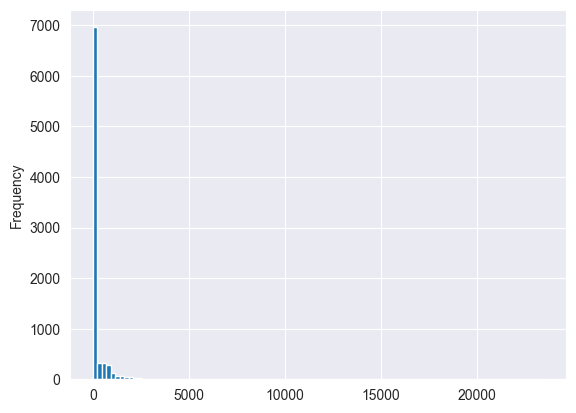

In [170]:
df[["Age"]] = mean_imputer.fit_transform(df[["Age"]])
df["ShoppingMall"].plot.hist(bins=100)

## Advanced Imputation Methods

### K-Nearest Neighbor Imputation


In [171]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

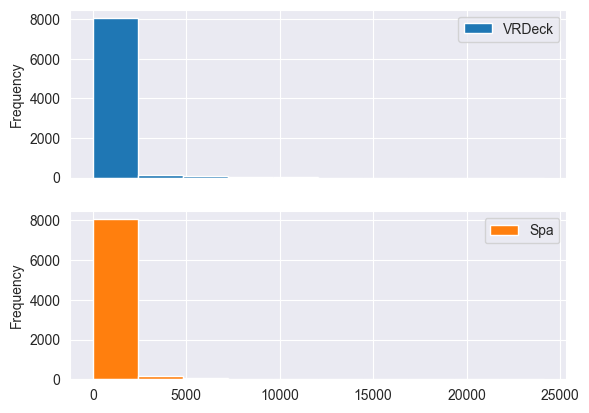

In [172]:
df[["VRDeck", "Spa"]].plot.hist(subplots=True)

In [173]:
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df[["VRDeck", "Spa"]])

In [174]:
knn_imputer = KNNImputer(n_neighbors=5)

In [175]:
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = min_max_scaler.inverse_transform(imputed_data)
df[["VRDeck", "Spa"]] = imputed_data

In [176]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

<Axes: >

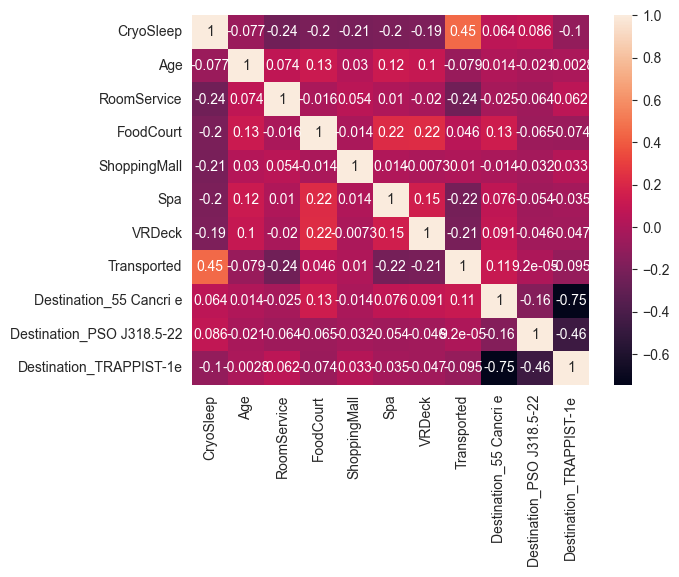

In [216]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [177]:
iterative_imputer = IterativeImputer()
imputed_data = iterative_imputer.fit_transform(df[["VRDeck", "FoodCourt", "Spa"]])
df[["VRDeck", "FoodCourt", "Spa"]] = imputed_data

In [178]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

## Time Series Missing Data Imputation

In [179]:
df = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Ex.2_Air_Quality_Missing.csv")

In [180]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,1/1/2017 0:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,73.0,57.0
1,1/1/2017 1:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,71.0,59.0
2,1/1/2017 2:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,70.0,59.0
3,1/1/2017 3:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,NaN,0.002,1.2,NaN,58.0
4,1/1/2017 4:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,NaN,0.002,1.2,NaN,61.0


In [181]:
df.isnull().sum()

Measurement date      0
Station code          0
Address               0
Latitude              0
Longitude             0
SO2                  74
NO2                  90
O3                   75
CO                  114
PM10                 95
PM2.5                78
dtype: int64

In [182]:
df["CO"] = df["CO"].ffill()
df.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                 90
O3                  75
CO                   0
PM10                95
PM2.5               78
dtype: int64

In [183]:
df["NO2"] = df["NO2"].bfill()
df.isnull().sum()

Measurement date     0
Station code         0
Address              0
Latitude             0
Longitude            0
SO2                 74
NO2                  0
O3                  75
CO                   0
PM10                95
PM2.5               78
dtype: int64

<Axes: >

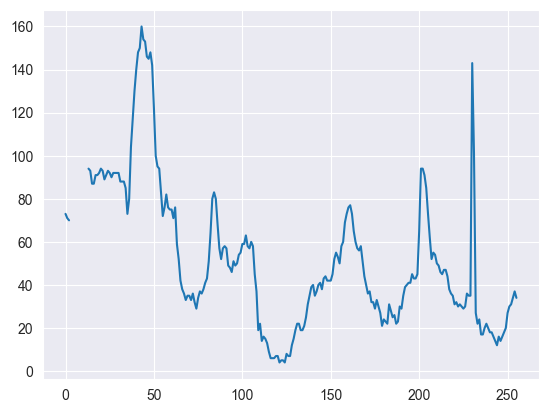

In [184]:
df["PM10"][:256].plot.line()

In [185]:
df["PM10"] = df["PM10"].interpolate(method="linear", limit_direction="both")

## Categorical Data Encoding

### Label Encoder

In [186]:
df = pd.read_csv("/Users/jovanvelichkoski/PycharmProjects/IntroToDataScience/AuditoryExercises/Ex.2_Spaceship_Titanic.csv")

In [187]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [188]:
label_encoder = LabelEncoder()

In [189]:
encoder_values = label_encoder.fit_transform(df["HomePlanet"])
encoder_values[:15]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0])

In [190]:
label_encoder.classes_

array(['Earth', 'Europa', 'Mars', nan], dtype=object)

In [191]:
pd.Series(encoder_values).isnull().sum()

np.int64(0)

In [192]:
ordinal_encoder = OrdinalEncoder(categories="auto")
encoded_values = ordinal_encoder.fit_transform(df[["HomePlanet"]])
encoded_values[:15]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.]])

In [193]:
ordinal_encoder.categories_

[array(['Earth', 'Europa', 'Mars', nan], dtype=object)]

### Dummy Encoding (One - Hot)

In [194]:
df["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [195]:
one_hot_encoded_values = pd.get_dummies(df[["Destination"]])
one_hot_encoded_values.head()

,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True


In [196]:
df = pd.concat([df, one_hot_encoded_values], axis=1)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,False,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,True
1,0002_01,Earth,False,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,True


### Ordinal Encoing

In [203]:
values = [["good"], ["bad"], ["neutral"], ["neutral"], ["good"], ["bad"], ["good"]]

In [207]:
ordinal_encoder = OrdinalEncoder(categories=[["bad", "neutral", "good"]])

In [208]:
encoded_values = ordinal_encoder.fit_transform(values)

In [209]:
encoded_values

array([[2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.]])

### Custom Encoding

In [211]:
def encode_bool_variable(value):
    return 1 if value else -1

In [212]:
df["CryoSleep"] = df["CryoSleep"].apply(encode_bool_variable)

In [213]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,-1,NaN,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,False,True
1,0002_01,Earth,-1,NaN,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,False,False,True
2,0003_01,Europa,-1,A/0/S,TRAPPIST-1e,NaN,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,False,True
3,0003_02,Europa,-1,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,False,True
4,0004_01,Earth,-1,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,False,False,True
